In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
!pip install pydotplus
import six
import sys
sys.modules['sklearn.externals.six']=six
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [9]:
import pandas as pd
df = pd.read_csv(r"C:\Users\jades\OneDrive\Documents\decision tree.csv")
d= {'sunny':0,'overcast':1,'rain':2}
e={'hot':0,'mild':1,'cool':2}
f={'high':0,'normal':1}
g={'weak':0,'strong':1}
h={'yes':0,'no':1}
df['outlook']=df['outlook'].map(d)
df['Temprature']=df['Temprature'].map(e)
df['humidity']=df['humidity'].map(f)
df['wild']=df['wild'].map(g)
df['Play_Golf']=df['Play_Golf'].map(h)



In [10]:
df.info()
df.shape
df.isnull().any()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   outlook     30 non-null     int64
 1   Temprature  30 non-null     int64
 2   humidity    30 non-null     int64
 3   wild        30 non-null     int64
 4   Play_Golf   30 non-null     int64
dtypes: int64(5)
memory usage: 1.3 KB


outlook       False
Temprature    False
humidity      False
wild          False
Play_Golf     False
dtype: bool

In [11]:
features=['outlook','Temprature','humidity','wild']
x=df[features]
y=df['Play_Golf']
print(x)
print(y)

    outlook  Temprature  humidity  wild
0         0           0         0     0
1         0           0         0     1
2         1           0         0     0
3         2           1         0     0
4         2           2         1     0
5         2           2         1     1
6         1           2         1     0
7         0           1         0     0
8         0           2         1     0
9         0           1         1     1
10        1           1         1     1
11        2           1         0     0
12        0           0         1     1
13        1           1         0     0
14        0           0         1     0
15        1           1         1     1
16        2           1         0     0
17        0           2         0     1
18        1           2         0     0
19        0           1         0     1
20        2           1         1     0
21        0           0         1     0
22        1           2         1     1
23        2           1         0     1


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,random_state=0)

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=2,random_state=0)
clf.fit(x_train,y_train)
clf.predict(x_test)

array([1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\ngini = 0.463\nsamples = 22\nvalue = [14, 8]'),
 Text(0.25, 0.5, 'x[1] <= 1.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.5, 'x[0] <= 1.5\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]')]

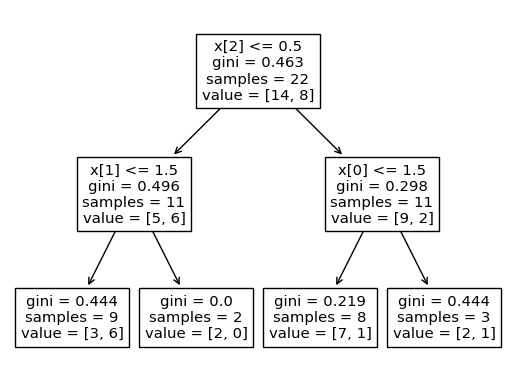

In [14]:
from sklearn.tree import plot_tree
plot_tree(clf)

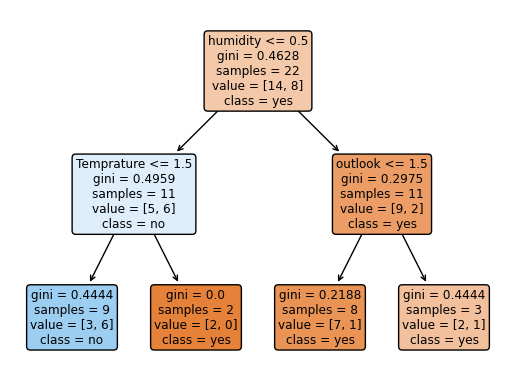

In [15]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


fn= ['outlook','Temprature','humidity','wild']
cn=['yes','no']
dec_tree=plot_tree(decision_tree=clf,feature_names=fn,class_names=cn,filled=True,precision=4,rounded=True)
                   
                   



In [16]:
from sklearn import metrics
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
Classification_report=metrics.classification_report(y_test,y_pred)

print("Classification_report-\n",metrics.classification_report(y_test,y_pred))


Accuracy: 0.75
Classification_report-
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.33      1.00      0.50         1

    accuracy                           0.75         8
   macro avg       0.67      0.86      0.67         8
weighted avg       0.92      0.75      0.79         8



In [17]:
pip install --upgrade graphviz pydotplus

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: graphviz in c:\users\jades\anaconda3\lib\site-packages (0.20.3)



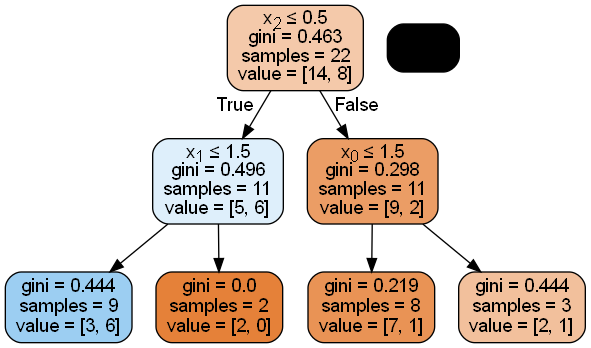

In [18]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from six import StringIO
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('work.png')
import matplotlib.pyplot as plt
Image(graph.create_png())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<humidity &le; 0.5<br/>gini = 0.463<br/>samples = 22<br/>value = [14, 8]<br/>class = yes>, fillcolor="#f4c9aa"] ;
1 [label=<Temprature &le; 1.5<br/>gini = 0.496<br/>samples = 11<br/>value = [5, 6]<br/>class = no>, fillcolor="#deeffb"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.444<br/>samples = 9<br/>value = [3, 6]<br/>class = no>, fillcolor="#9ccef2"] ;
1 -> 2 ;
3 [label=<gini = 0.0<br/>samples = 2<br/>value = [2, 0]<br/>class = yes>, fillcolor="#e58139"] ;
1 -> 3 ;
4 [label=<outlook &le; 1.5<br/>gini = 0.298<br/>samples = 11<br/>value = [9, 2]<br/>class = yes>, fillcolor="#eb9d65"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label=<gini = 0.219<br/>samples = 8<br/>value = [7, 1]<br/>class = yes>, fillcolor="#e99355"] ;
4 -> 5 ;
6 [label=<gini = 0.444<br/>samples = 3<br/>value = [2, 1]<br

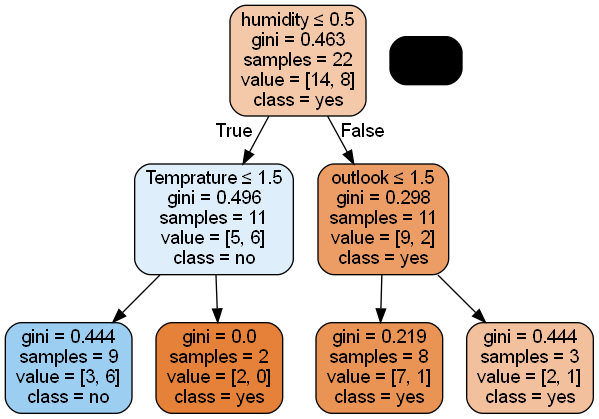

In [19]:
features=['outlook','Temprature','humidity','wild']
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['yes','no'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
print(dot_data.getvalue())

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
Image(graph.create_png())






C:\Users\jades\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jades\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\jades\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\jades\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

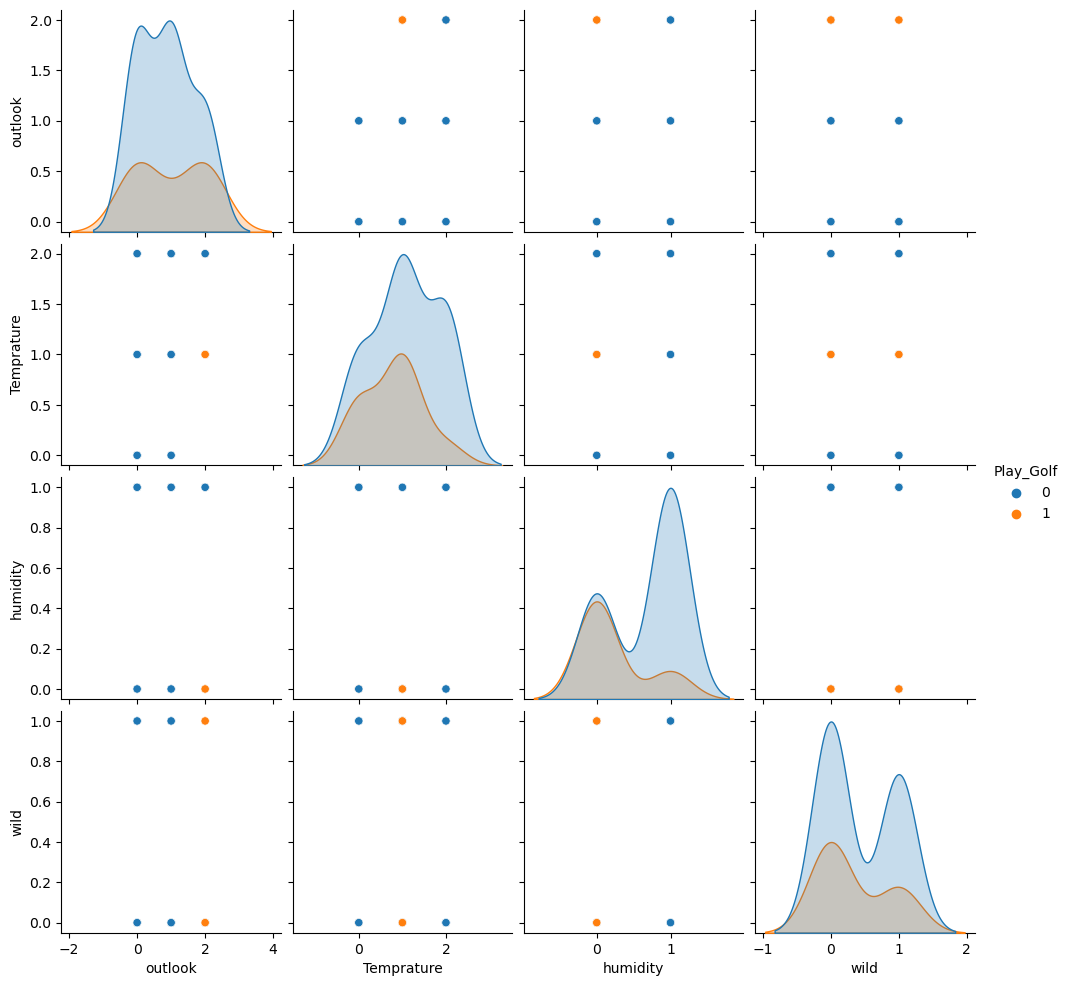

In [20]:
sns.pairplot(data=df,hue='Play_Golf')

<Axes: >

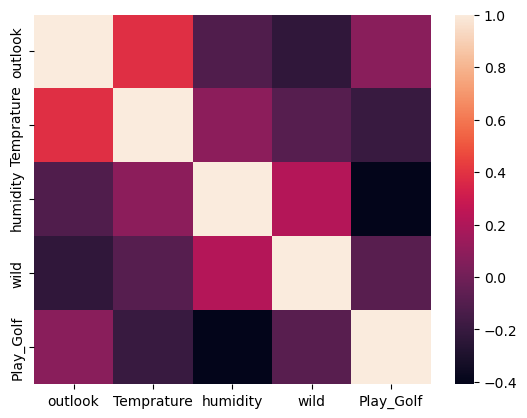

In [21]:
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Accuracy Score:0.75')

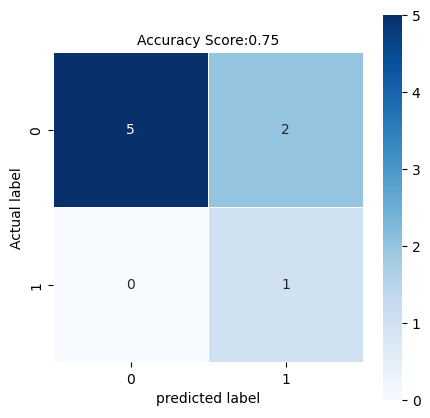

In [22]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('predicted label')
all_sample_title='Accuracy Score:{0}'.format(clf.score(x_test,y_test))
plt.title(all_sample_title,size=10)